# Web scraping and analysis

Scrape data from the web
The first thing to do will be to scrape review data from the web. For this, you should use a website called Skytrax.



## Scraping data from Skytrax
 Navigate to this link https://www.airlinequality.com/airline-reviews/british-airways

In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import string




In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 40
page_size = 100
reviews = []
for i in range(1,pages + 1):
    print(f"Scraping page{i}")
    
    url = f"{base_url}/page{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    content = response.content
    parsed_content = BeautifulSoup(content,"html.parser")
    for para in parsed_content.find_all("div",{"class":"text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---->{len(reviews)} total reviews")
        
        

Scraping page1
   ---->100 total reviews
Scraping page2
   ---->200 total reviews
Scraping page3
   ---->300 total reviews
Scraping page4
   ---->400 total reviews
Scraping page5
   ---->500 total reviews
Scraping page6
   ---->600 total reviews
Scraping page7
   ---->700 total reviews
Scraping page8
   ---->800 total reviews
Scraping page9
   ---->900 total reviews
Scraping page10
   ---->1000 total reviews
Scraping page11
   ---->1100 total reviews
Scraping page12
   ---->1200 total reviews
Scraping page13
   ---->1300 total reviews
Scraping page14
   ---->1400 total reviews
Scraping page15
   ---->1500 total reviews
Scraping page16
   ---->1600 total reviews
Scraping page17
   ---->1700 total reviews
Scraping page18
   ---->1800 total reviews
Scraping page19
   ---->1900 total reviews
Scraping page20
   ---->2000 total reviews
Scraping page21
   ---->2100 total reviews
Scraping page22
   ---->2200 total reviews
Scraping page23
   ---->2300 total reviews
Scraping page24
   ---->2400 

In [4]:
df = pd.DataFrame()
df["reviews"]=reviews
df

,reviews
0,✅ Trip Verified | Flight at 8.40am from DUB to...
1,✅ Trip Verified | Terrible. I have traveled t...
2,✅ Trip Verified | The customer service is ugl...
3,✅ Trip Verified | Most uncomfortable flight I...
4,✅ Trip Verified | I booked our first out of c...
...,...
3566,LHR-JFK-LAX-LHR. Check in was ok apart from be...
3567,LHR to HAM. Purser addresses all club passenge...
3568,My son who had worked for British Airways urge...
3569,London City-New York JFK via Shannon on A318 b...


In [5]:
df.to_csv("BRITISH AIRWAYS REVIEWS 2.csv")

In [6]:
df = pd.read_csv("BRITISH AIRWAYS REVIEWS.csv")
df = df.pop("reviews")
df

0       ✅ Trip Verified | Flight at 8.40am from DUB to...
1       ✅ Trip Verified |  Terrible. I have traveled t...
2       ✅ Trip Verified |  The customer service is ugl...
3       ✅ Trip Verified |  Most uncomfortable flight I...
4       ✅ Trip Verified |  I booked our first out of c...
                              ...                        
3566    LHR-JFK-LAX-LHR. Check in was ok apart from be...
3567    LHR to HAM. Purser addresses all club passenge...
3568    My son who had worked for British Airways urge...
3569    London City-New York JFK via Shannon on A318 b...
3570    SIN-LHR BA12 B747-436 First Class. Old aircraf...
Name: reviews, Length: 3571, dtype: object

In [7]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,"")
        
    return text

In [8]:
df = df.str.replace("✅ Trip Verified |","")

In [9]:
df = df.str.replace("|","")
df = df.str.replace(r"\b(w(1,3))\b","")
df = df.apply(remove_punctuations)
df

0        Flight at 840am from DUB to LCY cancelled 115...
1         Terrible I have traveled twice with them thi...
2         The customer service is ugly Tried calling t...
3         Most uncomfortable flight I have ever experi...
4         I booked our first out of country trip to ta...
                              ...                        
3566    LHRJFKLAXLHR Check in was ok apart from being ...
3567    LHR to HAM Purser addresses all club passenger...
3568    My son who had worked for British Airways urge...
3569    London CityNew York JFK via Shannon on A318 bu...
3570    SINLHR BA12 B747436 First Class Old aircraft 1...
Name: reviews, Length: 3571, dtype: object

In [10]:
df = df.str.replace("✅","")

In [33]:
df[1]

'  Terrible I have traveled twice with them this year via business class and they have been significantly delayed or cancellations with connecting flights The customer service or complete lack of it is appalling and has forced me to change credit cards as I no longer intend to use BA for any further flights Terrible uncomfy old planes and miserable staff '

In [12]:
df.shape

(3571,)

In [13]:
freq_words = pd.Series(" ".join(df).lower().split()).value_counts()[:50]

In [14]:
freq_words

the        28795
to         19058
and        17694
a          13106
was        12652
i          10534
of          8248
in          8162
on          7732
flight      6326
for         6083
with        5725
is          4542
not         4522
were        4360
ba          4339
it          4232
that        4108
we          4045
my          4002
but         3852
at          3722
this        3495
had         3407
they        3389
as          3387
have        3239
from        2987
no          2844
very        2773
service     2721
seat        2320
be          2302
food        2301
london      2119
so          2113
you         2112
crew        2097
british     2081
airways     2064
seats       2052
good        2039
are         2017
an          1982
time        1977
cabin       1925
me          1890
which       1850
class       1802
there       1670
dtype: int64

# Visualizing

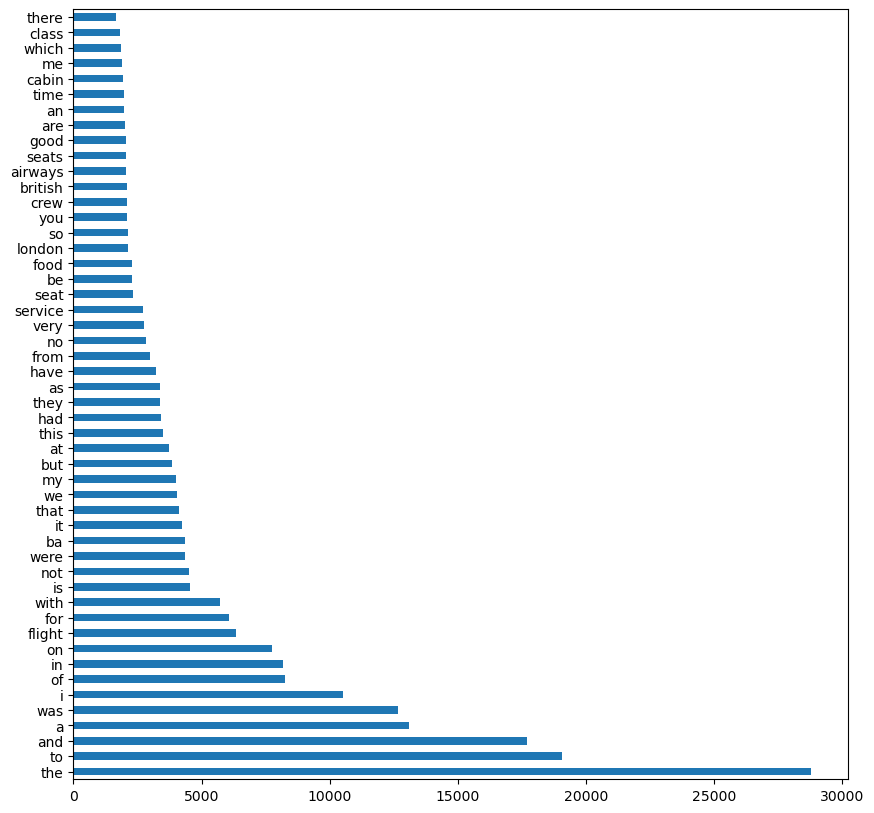

In [15]:
plt.figure(figsize=(10,10))
freq_words.plot.barh(x=freq_words[0],y=freq_words[1])
plt.show()

In [16]:
categories = ["negative","positive"]
numcat = len(categories)
numcat

2

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer


tokenizer = RegexpTokenizer(r'\w+')

tf_vect = TfidfVectorizer(lowercase=True,stop_words="english",ngram_range = (1,1),tokenizer=tokenizer.tokenize)

reviews_count = tf_vect.fit_transform(df)

reviews_count.shape

(3571, 15078)

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=numcat).fit(reviews_count)
pred_labels = kmeans.labels_
pred_labels

array([0, 0, 0, ..., 0, 1, 1])

In [19]:
cluster_centres = kmeans.cluster_centers_
cluster_centres

array([[3.23036970e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.74955152e-05],
       [3.11617727e-04, 6.82170827e-05, 6.29315864e-05, ...,
        6.24727552e-05, 9.03739820e-05, 0.00000000e+00]])

In [20]:
unique, counts = np.unique(pred_labels,return_counts = True)
dict(zip(unique,counts))

{0: 1399, 1: 2172}

In [21]:
from sklearn import metrics
dbi = metrics.davies_bouldin_score(reviews_count.toarray(),pred_labels)
ss = metrics.silhouette_score(reviews_count.toarray(),pred_labels, metric = "euclidean")
print("DBI Score:",dbi,"\nSilhouette_Score:",ss)

DBI Score: 13.059937915769895 
Silhouette_Score: 0.006047417208388837


In [25]:
df

0        Flight at 840am from DUB to LCY cancelled 115...
1         Terrible I have traveled twice with them thi...
2         The customer service is ugly Tried calling t...
3         Most uncomfortable flight I have ever experi...
4         I booked our first out of country trip to ta...
                              ...                        
3566    LHRJFKLAXLHR Check in was ok apart from being ...
3567    LHR to HAM Purser addresses all club passenger...
3568    My son who had worked for British Airways urge...
3569    London CityNew York JFK via Shannon on A318 bu...
3570    SINLHR BA12 B747436 First Class Old aircraft 1...
Name: reviews, Length: 3571, dtype: object

In [35]:
df = pd.DataFrame({"review":df,"label":pred_labels})

In [36]:
df

,review,label
0,Flight at 840am from DUB to LCY cancelled 115...,0
1,Terrible I have traveled twice with them thi...,0
2,The customer service is ugly Tried calling t...,0
3,Most uncomfortable flight I have ever experi...,1
4,I booked our first out of country trip to ta...,0
...,...,...
3566,LHRJFKLAXLHR Check in was ok apart from being ...,1
3567,LHR to HAM Purser addresses all club passenger...,1
3568,My son who had worked for British Airways urge...,0
3569,London CityNew York JFK via Shannon on A318 bu...,1


<AxesSubplot:xlabel='label', ylabel='Density'>

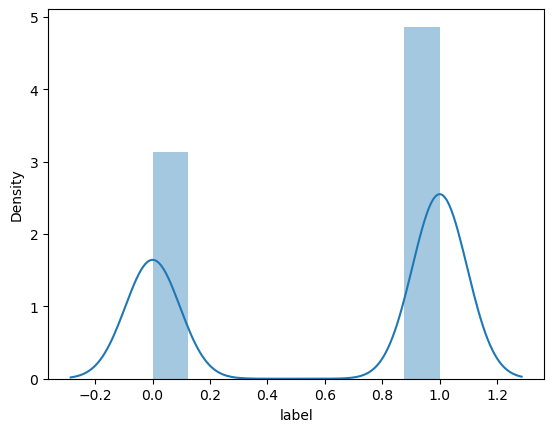

In [37]:
sns.distplot(df["label"],kde=True)

In [38]:
positive_rev = df.groupby("label").get_group(1)

In [39]:
positive_rev

,review,label
3,Most uncomfortable flight I have ever experi...,1
5,My husband and I booked seats within our prem...,1
8,An excellent flight in Club World on British ...,1
16,Busy day at LHR and flight full Lounge crowd...,1
17,Worst seats I have ever encountered in econom...,1
...,...,...
3564,LHRHKG on Boeing 747 230812 Much has been wri...,1
3566,LHRJFKLAXLHR Check in was ok apart from being ...,1
3567,LHR to HAM Purser addresses all club passenger...,1
3569,London CityNew York JFK via Shannon on A318 bu...,1


In [40]:
negative_rev = df.groupby("label").get_group(0)

In [41]:
negative_rev

,review,label
0,Flight at 840am from DUB to LCY cancelled 115...,0
1,Terrible I have traveled twice with them thi...,0
2,The customer service is ugly Tried calling t...,0
4,I booked our first out of country trip to ta...,0
6,Not Verified May 3 flew from Seattle to Heat...,0
...,...,...
3545,Lanzarote to Gatwick on 13th April Flight itse...,0
3549,Im not normally one to whine but here goes LHR...,0
3563,This was a bmi Regional operated flight on a R...,0
3565,Just got back from Bridgetown Barbados flying ...,0


In [42]:
positive_rev.shape

(2172, 2)

In [43]:
negative_rev.shape

(1399, 2)